In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = [3,4,5,6,7,8,9,10]
B0 = 4
B1 = 4

# Deterministic vs Sthocastic

Deterministic

In [3]:
Y_mat = [B0+B1*i for i in X]

In [4]:
Y_mat

[16, 20, 24, 28, 32, 36, 40, 44]

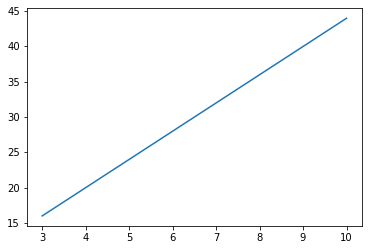

In [5]:
plt.plot(X,Y_mat)

probabilistics

In [6]:
Y_stat = [B0+B1*x+np.random.normal(0,1,1) for x in X]

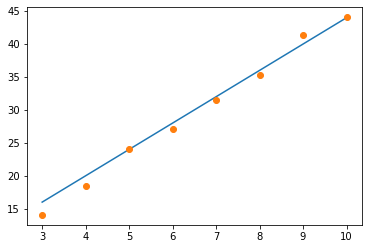

In [7]:
plt.plot(X,Y_mat)
plt.plot(X,Y_stat,marker='o',linestyle = '')

# Type of Regression

## Simple Regression

simple linear regression

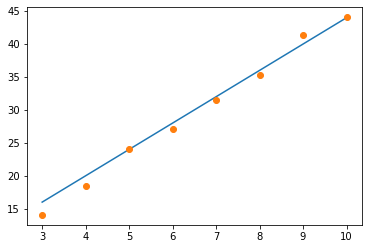

In [8]:
plt.plot(X,Y_mat)
plt.plot(X,Y_stat,marker='o',linestyle = '')

simple non-linear regression

In [9]:
def non_linear(X):
    B0 = 3
    B1 = 2
    B2 = 5
    noise = np.random.normal(0,1,1)
    return B0+B1*X+B2*X**2+noise

In [10]:
Y_non_linear = [non_linear(x) for x in X]

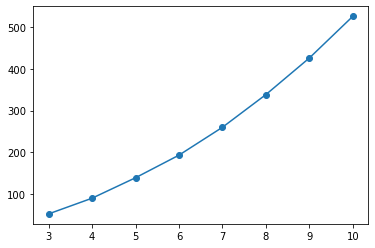

In [11]:
plt.plot(X,Y_non_linear,marker='o',linestyle = '-')

## Multiple Regression

linear multiple

In [12]:
def linear_multiple(X1,X2):
    B0 = 3
    B1 = 2
    B2 = 5
    noise = np.asscalar(np.random.normal(0,1,1))
    return B0+B1*X1+B2*X2+noise

In [13]:
X1 = [3,2.9,4,4.1,5,5.1,6,6,7,6.9,8.1,8,9,9,9.8,10]
X2 = [3.2,4.1,5.2,6,3.2,3.9,4.9,6.1,3,4,5.5,6,3,4.3,5,6]

In [14]:
Y_linear_multiple = [linear_multiple(x1, x2) for x1, x2 in zip(X1, X2)]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


In [15]:
pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'Y':Y_linear_multiple
})

,X1,X2,Y
0,3.0,3.2,24.454846
1,2.9,4.1,28.765809
2,4.0,5.2,36.532883
3,4.1,6.0,40.883472
4,5.0,3.2,29.358096
5,5.1,3.9,32.681199
6,6.0,4.9,39.777865
7,6.0,6.1,48.039938
8,7.0,3.0,31.626439
9,6.9,4.0,37.821573


non linear multiple

In [16]:
def nonlinear_multiple(X1,X2):
    B0 = 3
    B1 = 2
    B2 = 5
    B3 = 2
    B4 = 3
    noise = np.asscalar(np.random.normal(0,1,1))
    return B0+B1*X1+B2*X1**2+B3*X2+B4*X2**2+noise

In [17]:
Y_nonlinear_multiple = [nonlinear_multiple(x1, x2) for x1, x2 in zip(X1, X2)]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys


In [18]:
pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'Y':Y_nonlinear_multiple
})

,X1,X2,Y
0,3.0,3.2,91.618290
1,2.9,4.1,110.340199
2,4.0,5.2,183.169705
3,4.1,6.0,214.077594
4,5.0,3.2,174.085248
5,5.1,3.9,195.735818
6,6.0,4.9,276.771132
7,6.0,6.1,317.652974
8,7.0,3.0,294.637150
9,6.9,4.0,310.100439


# Linear Regression Model Assumption

1. linear in coefficient and error term
1. mean(error) = 0
1. cor(Xi,error) = 0
1. cor(error-i,error-i') = 0
1. var(e) = sigma
1. ceteris paribus
1. e~normal(mean, std)

In [19]:
linear_multiple_data = pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'Y':Y_linear_multiple
})

nonlinear_multiple_data = pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'Y':Y_nonlinear_multiple
})

> multiple linear

In [20]:
import statsmodels.api as sm
from statsmodels.api import OLS

sm_lm = OLS(linear_multiple_data['Y'], sm.add_constant(linear_multiple_data[['X1','X2']]))
result = sm_lm.fit()

#1 linear in coefficient and error term

In [21]:
result.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     629.3
Date:                Mon, 04 May 2020   Prob (F-statistic):           1.15e-13
Time:                        10:09:31   Log-Likelihood:                -19.541
No. Observations:                  16   AIC:                             45.08
Df Residuals:                      13   BIC:                             47.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0531      1.076      1.908      0.079      -0.272       4.378
X1             2.0396      0.102     19.982      0.000       1.819       2.260
X2             5.1771      0.209     24.791      0.000       4.726       5.628
==============================================================================
Omnibus:                        4.910   Durbin-Watson:                   2.391
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                2.272
Skew:                           0.704   Prob(JB):                        0.321
Kurtosis:                       4.195   Cond. No.                         39.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#2 mean(error)

In [22]:
np.mean(result.resid)

2.6867397195928788e-14

#3 cor(Xi,error)=0

In [23]:
linear_multiple_data['error'] = result.resid

In [24]:
linear_multiple_data[['X1','X2','error']].corr().astype(int)

,X1,X2,error
X1,1,0,0
X2,0,1,0
error,0,0,1


#4 cor(error-i,error-i')
#5 var(e) = sigma

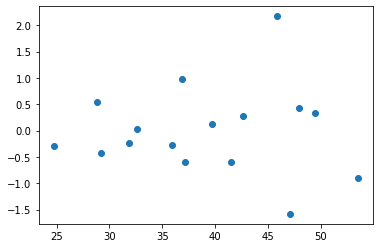

In [25]:
plt.plot(result.fittedvalues,result.resid,marker='o',linestyle = '')

#6 ceteris paribus

In [26]:
linear_multiple_data[['X1','X2']].corr().astype(int)

,X1,X2
X1,1,0
X2,0,1


#7 e~normal(mean, std)

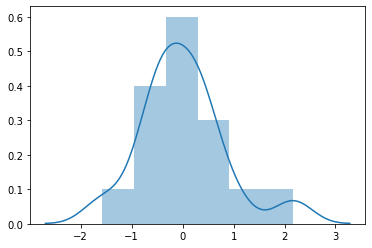

In [27]:
sns.distplot(result.resid)

In [28]:
#Inspecting if our residual following the normal distribution or not
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
try_normal(result.resid)

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


{'Anderson': {15.0: 0.5,
  10.0: 0.569,
  5.0: 0.683,
  2.5: 0.797,
  1.0: 0.948,
  'stat': 0.3556907976164254},
 'Shapiro': 0.4808712899684906,
 'K^2': 0.08588239518008438}

> multiple nonlinear (assumption violation)

In [29]:
sm_lm = OLS(nonlinear_multiple_data['Y'], sm.add_constant(linear_multiple_data[['X1','X2']]))
result2 = sm_lm.fit()

#1 linear in coefficient and error term

In [30]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     317.7
Date:                Mon, 04 May 2020   Prob (F-statistic):           9.19e-12
Time:                        10:09:33   Log-Likelihood:                -72.936
No. Observations:                  16   AIC:                             151.9
Df Residuals:                      13   BIC:                             154.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -239.4785     30.285     -7.908      0.000    -304.904    -174.053
X1            66.7371      2.872     23.235      0.000      60.532      72.942
X2            29.3804      5.877      5.000      0.000      16.685      42.076
==============================================================================
Omnibus:                        2.587   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.517
Skew:                           0.492   Prob(JB):                        0.468
Kurtosis:                       1.858   Cond. No.                         39.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#2 mean(error)

In [31]:
np.mean(result2.resid)

-3.197442310920451e-14

#3 cor(Xi,error)=0

In [32]:
nonlinear_multiple_data['error'] = result2.resid

In [33]:
nonlinear_multiple_data[['X1','X2','error']].corr().astype(int)

,X1,X2,error
X1,1,0,0
X2,0,1,0
error,0,0,1


#4 cor(error-i,error-i')
#5 var(e) = sigma

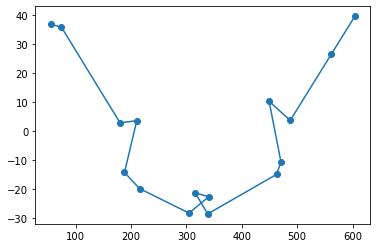

In [34]:
plt.plot(result2.fittedvalues,result2.resid,marker='o',linestyle = '-')

#6 ceteris paribus

In [35]:
nonlinear_multiple_data[['X1','X2']].corr().astype(int)

,X1,X2
X1,1,0
X2,0,1


#7 e~normal(mean, std)

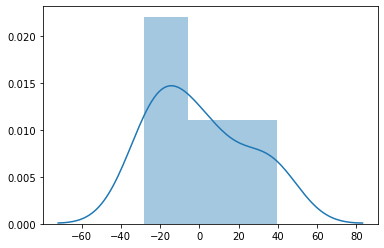

In [36]:
sns.distplot(result2.resid)

In [37]:
#Inspecting if our residual following the normal distribution or not
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
try_normal(result2.resid)

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


{'Anderson': {15.0: 0.5,
  10.0: 0.569,
  5.0: 0.683,
  2.5: 0.797,
  1.0: 0.948,
  'stat': 0.6159478079841207},
 'Shapiro': 0.061543237417936325,
 'K^2': 0.2743601169079361}

> multiple nonlinear (assumption fullfiled)

In [38]:
nonlinear_multiple_data['X1**2'] = nonlinear_multiple_data['X1']**2
nonlinear_multiple_data['X2**2'] = nonlinear_multiple_data['X2']**2
nonlinear_multiple_data

,X1,X2,Y,error,X1**2,X2**2
0,3.0,3.2,91.618290,36.868178,9.00,10.24
1,2.9,4.1,110.340199,35.821462,8.41,16.81
2,4.0,5.2,183.169705,2.921703,16.00,27.04
3,4.1,6.0,214.077594,3.651577,16.81,36.00
4,5.0,3.2,174.085248,-14.139138,25.00,10.24
5,5.1,3.9,195.735818,-19.728545,26.01,15.21
6,6.0,4.9,276.771132,-28.137032,36.00,24.01
7,6.0,6.1,317.652974,-22.511641,36.00,37.21
8,7.0,3.0,294.637150,-21.185436,49.00,9.00
9,6.9,4.0,310.100439,-28.428810,47.61,16.00


In [39]:
sm_lm = OLS(nonlinear_multiple_data['Y'], sm.add_constant(nonlinear_multiple_data[['X1','X1**2','X2','X2**2']]))
result3 = sm_lm.fit()

#1 linear in coefficient and error term

In [40]:
result3.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.680e+05
Date:                Mon, 04 May 2020   Prob (F-statistic):           3.09e-26
Time:                        10:09:34   Log-Likelihood:                -16.054
No. Observations:                  16   AIC:                             42.11
Df Residuals:                      11   BIC:                             45.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8465      4.730      1.025      0.328      -5.564      15.257
X1             0.6788      0.576      1.177      0.264      -0.590       1.948
X1**2          5.1097      0.044    115.959      0.000       5.013       5.207
X2             2.7795      1.954      1.422      0.183      -1.521       7.080
X2**2          2.9066      0.213     13.615      0.000       2.437       3.377
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.857
Skew:                           0.550   Prob(JB):                        0.651
Kurtosis:                       2.723   Cond. No.                     1.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#2 mean(error)

In [41]:
np.mean(result3.resid)

-8.970602038971265e-14

#3 cor(Xi,error)=0

In [42]:
nonlinear_multiple_data['error'] = result3.resid

In [43]:
nonlinear_multiple_data[['X1','X2','error']].corr().astype(int)

,X1,X2,error
X1,1,0,0
X2,0,1,0
error,0,0,1


#4 cor(error-i,error-i')
#5 var(e) = sigma

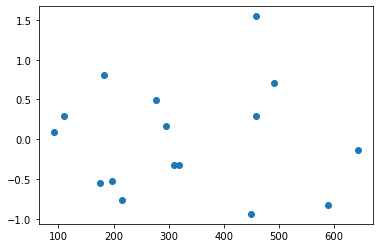

In [44]:
plt.plot(result3.fittedvalues,result3.resid,marker='o',linestyle = '')

#6 ceteris paribus

In [45]:
nonlinear_multiple_data[['X1','X2']].corr().astype(int)

,X1,X2
X1,1,0
X2,0,1


#7 e~normal(mean, std)

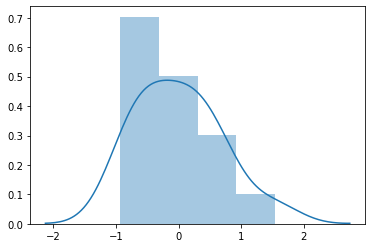

In [46]:
sns.distplot(result3.resid)

In [47]:
#Inspecting if our residual following the normal distribution or not
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
try_normal(result3.resid)

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


{'Anderson': {15.0: 0.5,
  10.0: 0.569,
  5.0: 0.683,
  2.5: 0.797,
  1.0: 0.948,
  'stat': 0.2232361246204313},
 'Shapiro': 0.638364851474762,
 'K^2': 0.5078389266866661}